In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings("ignore")


In [2]:
import acquire as acq
import prepare as prep

from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain
from acquire import get_telco_data
from prepare import DFO

In [3]:
local_settings.splain=True

In [4]:
local_settings.debug=True

In [5]:
splain = local_settings.splain
debug = local_settings.debug

In [6]:
    df = get_telco_data(splain=splain)
    df = df.set_index('customer_id')
    print(df.head(5))

starting get_telco_data
starting sql_df
starting get_db_url
ending get_db_url ; time: 4.291534423828125e-06
starting check_df
starting frame_splain
DATAFRAME SHAPE:
(7043, 39) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
is_male                     7043 non-null int64
senior_citizen              7043 non-null int64
partner                     7043 non-null int64
dependents                  7043 non-null int64
family                      7043 non-null int64
partner_deps_id             7043 non-null int64
partner_deps                7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null int64
multiple_lines              7043 non-null int64
phone_service_id            7043 non-null int64
phone_service_type          7043 non-null object
internet_service_type_i

In [7]:
df.head(5)

,gender,is_male,senior_citizen,partner,dependents,family,partner_deps_id,partner_deps,tenure,phone_service,...,on_contract,contract_duration,paperless_billing,payment_type_id,payment_type,auto_pay,monthly_charges,total_charges,avg_monthly_variance,churn
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,Male,1,0,0,0,0,0,"No partner, no dependents",9,1,...,1,1,0,2,Mailed check,0,59.9,542.40,0.37,0
0004-TLHLJ,Male,1,0,0,0,0,0,"No partner, no dependents",4,1,...,1,1,1,1,Electronic check,0,73.9,280.85,-3.69,1
0011-IGKFF,Male,1,1,1,0,1,2,"Has partner, no dependents",13,1,...,1,1,1,1,Electronic check,0,98.0,1237.85,-2.78,1
0013-EXCHZ,Female,0,1,1,0,1,2,"Has partner, no dependents",3,1,...,1,1,1,2,Mailed check,0,83.9,267.40,5.23,1
0013-MHZWF,Female,0,0,0,1,1,1,"No partner, has dependents",9,1,...,1,1,1,4,Credit card (automatic),1,69.4,571.45,-5.91,0


In [8]:
# df = dfo.df

In [9]:
@timeifdebug
def retype_cols(dataframe, columns, to_dtype, **kwargs):
    '''
    retype_cols(dataframe, columns, to_dtype, **kwargs)
    RETURNS dataframe with updated column types
    '''
    for col in (xcol for xcol in columns if xcol in dataframe.columns):
        dataframe[col] = dataframe[col].astype(to_dtype)
    
    # print(dataframe.dtypes)
    return dataframe

In [10]:
category_cols=[
    'partner_deps_id',
    'partner_deps',
    'gender',
    'contract_type_id',
    'internet_service_type_id',
    'internet_service_type',
    'contract_type',
    'payment_type_id',
    'payment_type',
    'phone_service_type',
    'phone_service_id'
]

category_cols

['partner_deps_id',
 'partner_deps',
 'gender',
 'contract_type_id',
 'internet_service_type_id',
 'internet_service_type',
 'contract_type',
 'payment_type_id',
 'payment_type',
 'phone_service_type',
 'phone_service_id']

In [11]:
df = retype_cols(dataframe=df, columns=category_cols, to_dtype='category')   
print(df.dtypes)

starting retype_cols
ending retype_cols ; time: 0.06489992141723633
gender                      category
is_male                        int64
senior_citizen                 int64
partner                        int64
dependents                     int64
family                         int64
partner_deps_id             category
partner_deps                category
tenure                         int64
phone_service                  int64
multiple_lines                 int64
phone_service_id            category
phone_service_type          category
internet_service_type_id    category
internet_service_type       category
internet_service               int64
has_dsl                        int64
has_fiber                      int64
online_security                int64
online_backup                  int64
online_security_backup         int64
device_protection              int64
tech_support                   int64
streaming_tv                   int64
streaming_movies               int64
streami

In [12]:
boolean_cols  = [
    'is_male',
    'senior_citizen',
    'partner',
    'dependents',
    'family',
    'phone_service',
    'multiple_lines',
    'internet_service',
    'has_dsl',
    'has_fiber',
    'online_security',
    'online_backup',
    'online_security_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'streaming_services',
    'on_contract',
    'paperless_billing',
    'auto_pay'
]

boolean_cols

['is_male',
 'senior_citizen',
 'partner',
 'dependents',
 'family',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'has_dsl',
 'has_fiber',
 'online_security',
 'online_backup',
 'online_security_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_services',
 'on_contract',
 'paperless_billing',
 'auto_pay']

In [13]:
df = retype_cols(dataframe=df, columns=boolean_cols, to_dtype='bool')
print(df.dtypes)

starting retype_cols
ending retype_cols ; time: 0.05998110771179199
gender                      category
is_male                         bool
senior_citizen                  bool
partner                         bool
dependents                      bool
family                          bool
partner_deps_id             category
partner_deps                category
tenure                         int64
phone_service                   bool
multiple_lines                  bool
phone_service_id            category
phone_service_type          category
internet_service_type_id    category
internet_service_type       category
internet_service                bool
has_dsl                         bool
has_fiber                       bool
online_security                 bool
online_backup                   bool
online_security_backup          bool
device_protection               bool
tech_support                    bool
streaming_tv                    bool
streaming_movies                bool
streami

In [14]:
string_cols = [
    'partner_deps',
    'gender',
    'internet_service_type',
    'contract_type',
    'payment_type',
    'phone_service_type',
]

string_cols

['partner_deps',
 'gender',
 'internet_service_type',
 'contract_type',
 'payment_type',
 'phone_service_type']

In [15]:
dfo = prep.set_dfo(dfo_df=df, y_column='churn', splain=True)

starting set_dfo
ending set_dfo ; time: 1.52587890625e-05


In [16]:
# dfo.df = df

In [17]:
frame_splain(dfo.df, splain=True)

starting frame_splain
DATAFRAME SHAPE:
(7043, 38) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0003-MKNFE to 9995-HOTOH
Data columns (total 38 columns):
gender                      7043 non-null category
is_male                     7043 non-null bool
senior_citizen              7043 non-null bool
partner                     7043 non-null bool
dependents                  7043 non-null bool
family                      7043 non-null bool
partner_deps_id             7043 non-null category
partner_deps                7043 non-null category
tenure                      7043 non-null int64
phone_service               7043 non-null bool
multiple_lines              7043 non-null bool
phone_service_id            7043 non-null category
phone_service_type          7043 non-null category
internet_service_type_id    7043 non-null category
internet_service_type       7043 non-null category
internet_service            7043 non-null bool
has_dsl                     7043 n

starting heatmap_train


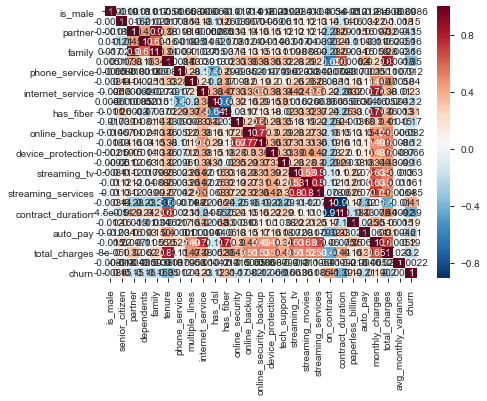

ending heatmap_train ; time: 2.3680691719055176


In [18]:
prep.heatmap_train(df, show_now=True)

In [19]:
# prep.pairplot_train(df, show_now=True)

In [20]:
df[df.avg_monthly_variance != 0]

,gender,is_male,senior_citizen,partner,dependents,family,partner_deps_id,partner_deps,tenure,phone_service,...,on_contract,contract_duration,paperless_billing,payment_type_id,payment_type,auto_pay,monthly_charges,total_charges,avg_monthly_variance,churn
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,Male,True,False,False,False,False,0,"No partner, no dependents",9,True,...,True,1,False,2,Mailed check,False,59.90,542.40,0.37,0
0004-TLHLJ,Male,True,False,False,False,False,0,"No partner, no dependents",4,True,...,True,1,True,1,Electronic check,False,73.90,280.85,-3.69,1
0011-IGKFF,Male,True,True,True,False,True,2,"Has partner, no dependents",13,True,...,True,1,True,1,Electronic check,False,98.00,1237.85,-2.78,1
0013-EXCHZ,Female,False,True,True,False,True,2,"Has partner, no dependents",3,True,...,True,1,True,2,Mailed check,False,83.90,267.40,5.23,1
0013-MHZWF,Female,False,False,False,True,True,1,"No partner, has dependents",9,True,...,True,1,True,4,Credit card (automatic),True,69.40,571.45,-5.91,0
0015-UOCOJ,Female,False,True,False,False,False,0,"No partner, no dependents",7,True,...,True,1,True,1,Electronic check,False,48.20,340.35,0.42,0
0018-NYROU,Female,False,False,True,False,True,2,"Has partner, no dependents",5,True,...,True,1,True,1,Electronic check,False,68.95,351.50,1.35,0
0023-XUOPT,Female,False,False,True,False,True,2,"Has partner, no dependents",13,True,...,True,1,False,1,Electronic check,False,94.10,1215.60,-0.59,1
0027-KWYKW,Female,False,False,True,True,True,3,"Has partner, has dependents",23,True,...,True,1,True,1,Electronic check,False,83.75,1849.95,-3.32,0


In [21]:
@timeifdebug
def drop_cols(df, cols, **kwargs):
    '''
    drop_cols(dataframe, columns, **kwargs)
    RETURNS dataframe with columns removed
    
    Function first checks to ensure columns are in dataframe.
    '''
    dropcols = [col for col in cols if col in df.columns]
    if len(dropcols):
        df = df.drop(columns=dropcols)    
    return df

In [22]:
# df2 = acq.check_df(dfo.train)
# df2 is df

In [23]:
# df2 = drop_cols(df=df2, cols=string_cols)
# frame_splain(df2, splain=True)

In [24]:
dfo = prep.split_dfo(dfo, train_pct=.7, randomer=123456789, stratify=dfo.y_column, drop_cols=string_cols, splain=local_settings.splain)

starting split_dfo
starting remove_cols
ending remove_cols ; time: 0.0022690296173095703
starting split_my_data_whole
ending split_my_data_whole ; time: 0.006488800048828125
starting frame_splain
DFO TRAIN SHAPE:
(5282, 32) 

DFO TRAIN INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 5138-WVKYJ to 5816-QVHRX
Data columns (total 32 columns):
is_male                     5282 non-null bool
senior_citizen              5282 non-null bool
partner                     5282 non-null bool
dependents                  5282 non-null bool
family                      5282 non-null bool
partner_deps_id             5282 non-null category
tenure                      5282 non-null int64
phone_service               5282 non-null bool
multiple_lines              5282 non-null bool
phone_service_id            5282 non-null category
internet_service_type_id    5282 non-null category
internet_service            5282 non-null bool
has_dsl                     5282 non-null bool
has_fiber        

In [25]:
dfo = prep.scale_dfo(dfo, scaler_fn=None, splain=splain)

starting scale_dfo
starting xy_df
starting frame_splain
ending frame_splain ; time: 1.2159347534179688e-05
starting frame_splain
ending frame_splain ; time: 9.059906005859375e-06
ending xy_df ; time: 0.0037348270416259766
starting xy_df
starting frame_splain
ending frame_splain ; time: 1.71661376953125e-05
starting frame_splain
ending frame_splain ; time: 9.775161743164062e-06
ending xy_df ; time: 0.006147146224975586
starting frame_splain
X_TRAIN SHAPE:
(5282, 32) 

X_TRAIN INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 5138-WVKYJ to 5816-QVHRX
Data columns (total 32 columns):
is_male                     5282 non-null bool
senior_citizen              5282 non-null bool
partner                     5282 non-null bool
dependents                  5282 non-null bool
family                      5282 non-null bool
partner_deps_id             5282 non-null category
tenure                      5282 non-null int64
phone_service               5282 non-null bool
multiple_lines  

In [26]:
type(dfo.train)# print(df.loc[:,['internet_service', 'has_dsl', 'has_fiber']])

pandas.core.frame.DataFrame

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
# for classification you can change the algorithm to gini or entropy (information gain).  Default is gini.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=dfo.randomer)


In [43]:
clf.fit(dfo.X_train, dfo.y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123456789, splitter='best')

In [44]:
# type(df)

In [45]:
y_pred = clf.predict(dfo.X_train)
y_pred[0:5]

array([1, 0, 1, 0, 1])

In [46]:
y_pred_proba = clf.predict_proba(dfo.X_train)
y_pred_proba

array([[0.285     , 0.715     ],
       [0.76404494, 0.23595506],
       [0.48031496, 0.51968504],
       ...,
       [0.97308489, 0.02691511],
       [0.78337531, 0.21662469],
       [0.63779528, 0.36220472]])

In [47]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(dfo.X_train, dfo.y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [48]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(dfo.X_test, dfo.y_test)))

Accuracy of Decision Tree classifier on training set: 0.80
